$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [12]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [13]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [14]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [15]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  step_length=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf,2*A),gradf))
  
  return step_length

In [16]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p=rho
  y=gamma
  #implement the backtracking line search
  while evalf(x+alpha*(-gradf)) > evalf(x)-y*alpha*np.dot((gradf.T),gradf):
    alpha=p*alpha


  #print('final step length:',alpha)
  return alpha

In [17]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [40]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      # raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k


In [42]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt,itr = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print(x_opt)
print(evalf(x_opt))

# check what happens when you call find_minimzer using backtracking line search
x_opt_bls,itr = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)
print(evalf(x_opt_bls))

iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
[  7.99999775 -11.99999582]
2.2517218946096954e-11
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
[  8. -12.]
0.0


$\huge{3.}$ \
For constant step length, minimizer = $[7.99999775, -11.99999582]$ and the minimum function value is $2.2517218946096954e-11$ \
For backtracking line search, minimizer = $[8, -12]$ and the minimum function value is $0.0$

$\huge{4.}$ \
The code is implemented below:

In [43]:
my_start_x = np.array([25,25])
my_tol= 1e-12
x_opt,iterations = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print('Minimizer for exact steplength is, ',x_opt)
print('Minimum value of function is,' ,evalf(x_opt))
print('Number of iterations =',iterations)

iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for exact steplength is,  [  8. -12.]
Minimum value of function is, 0.0
Number of iterations = 1


In [44]:
my_start_x = np.array([25,25])
my_tol= 1e-12
x_opt_bls,iterations = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Minimizer for backtracking line search is, ',x_opt_bls)
print('Minimum value of function is,' ,evalf(x_opt_bls))
print('Number of iterations =',iterations)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 0.0
Number of iterations = 1


**Observations:** In both the exact step length method and the backtracking line search method, we can see that the number of iterations required to reach the desired point (minimizer) is 1.

$\huge{5.}$ \
The code is implemented below:

In [47]:
my_start_x=np.array([25,25])
my_tol=10**(-10)
alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
iterations=[]
minimizers=[]
min_val=[]
for a in alpha:
  print('Alpha =',a)
  x_opt_bls,itr = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, a, 0.5,0.5)
  print('Minimizer for backtracking line search is, ',x_opt_bls)
  print('Minimum value of function is,' ,evalf(x_opt_bls))
  print('Number of iterations =',itr)
  print('\n')
  iterations.append(itr)
  minimizers.append(x_opt_bls)
  min_val.append(evalf(x_opt_bls))

Alpha = 1
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 0.0
Number of iterations = 1


Alpha = 0.9
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 1.6579714975258972e-21
Number of iterations = 12


Alpha = 0.75
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 1.3714654556129199e-21
Number of iterations = 20


Alpha = 0.6
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at 

$\large{Plot:}$

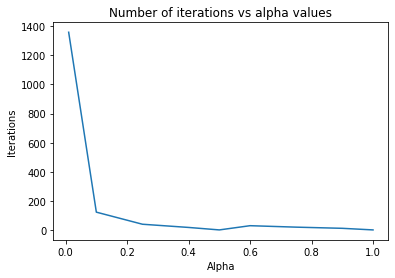

In [49]:
import matplotlib.pyplot as plt
plt.plot(alpha,iterations)
# plt.grid()
plt.title('Number of iterations vs alpha values')
plt.ylabel('Iterations')
plt.xlabel('Alpha')
plt.show()

**Observations:** We observe that as we decrease the value of alpha from 1 to 0.5, the number of iterations to reach the minimzer increases, but for alpha values 1 and 0.5, the number of iterations is 1, and beyond this, if we decrease the value of alpha from 0.5 to 0.01, the number of iterations increases again. For alpha values of 1 and 0.5, the number of iterations is 1, which means that these two values are the most suitable values. Also, for each value of the alpha the minimum value of the function approaches zero. \
\
As calculated above, the exact line search method requires just one iteration to terminate, and for alpha values 0.5 and 1, the backtracking algorithm takes 1 iteration to terminate, while for other values of alpha, backtracking algorithm is requires more number of iterations. Hence, we can conclude that the exact line search is faster, but it can't be used in a general sense.

$\huge{6.}$ \
The code is implemented below: \

In [51]:
my_start_x=np.array([25,25])
my_tol=10**(-10)
rho=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iterations=[]
minimizers=[]
min_val=[]
for r in rho:
  print('For rho =',r)
  x_opt_bls,itr = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, r,0.5)
  print('Minimizer for backtracking line search is, ',x_opt_bls)
  print('Minimum value of function is,' ,evalf(x_opt_bls))
  print('Number of iterations =',itr)
  print('\n')
  iterations.append(itr)
  minimizers.append(x_opt_bls)
  min_val.append(evalf(x_opt_bls))

For rho = 0.9
Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 4.960536411900771e-22
Number of iterations = 9


For rho = 0.75
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 1.0819468296335504e-21
Number of iterations = 15


For rho = 0.6
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Minimizer for backtracking line search is,  [  8. -12.]
Minimum value of function is, 7.844395544174143e-22
Number of iterations = 22


For rho = 0.5
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25] 

$\large{Plot:}$

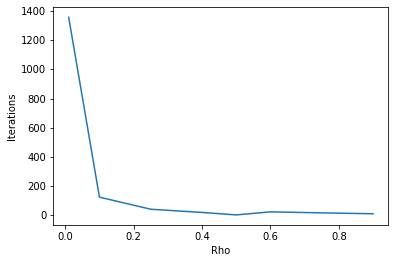

In [52]:
plt.plot(rho,iterations)
plt.ylabel('Iterations')
plt.xlabel('Rho')
plt.show()

**Observations:** On decreasing the value of rho from 0.9 to 0.5, the number of iterations increases. However, at rho = 0.5, the number of iterations is 1, and beyond this, if we decrease the value of rho from 0.5 to 0.01, the number of iterations increases. At rho = 0.5, the number of iteration is 1, which means that it is the more suitable value for this method. Also, for each value of rho, the minimum value of the function is approaching to zero.